In [1]:
import numpy as np
import math
from random import *
import matplotlib.pyplot as plt

In [2]:
mu, sigma = 0, 0.5 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 10000) #w1
s2 = np.random.normal(mu, sigma, 10000) #w2
s3 = np.random.normal(mu, sigma, 10000) #w3
s4=1-s1-s2-s3

In [3]:
expected_returns=np.array([ 1.10, 1.12,1.07,1.025,])
returns=s1*expected_returns[0]+s2*expected_returns[1]+s3*expected_returns[2]+s4*expected_returns[3]
covariance_matrix=np.array([[0.06,0.0377,0.0259],[0.0377,0.0950,0.0285],[0.0259,0.0285,0.07]])

weights=np.column_stack((s1,s2,s3))
variance=[]
for i in range(0,10000):
    variance=variance+[math.sqrt(np.dot(np.dot(weights[i,:],covariance_matrix),weights[i,:].T))]


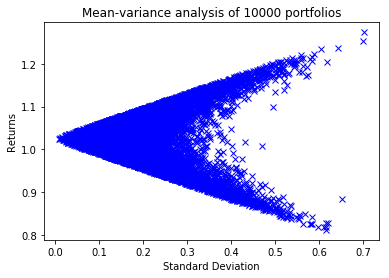

In [4]:
plt.plot(variance,returns,'bx')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.title('Mean-variance analysis of 10000 portfolios')
plt.show()


In [5]:
risky_returns=np.array([1.1,1.12,1.07])
w=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)
w_s4=1-sum(w)

returns=sum(w*risky_returns)+w_s4*1.025
variance=np.dot(np.dot(w.T,covariance_matrix),w)
stdev=math.sqrt(variance)
sharpe_ratio=(returns-1.025)/stdev
print("Mean", returns)
print("Stdev", stdev)
print("Sharpe Ratio", sharpe_ratio)


Mean 1.151234693
Stdev 0.35529521949545656
Sharpe Ratio 0.355295219495


In [6]:
print(w,w_s4)

[ 0.80294532  0.6579969   0.07786864] -0.538810855648


In [7]:
#(d)
norm=sum(w)
w=w/norm
print(w)
returns=sum(w*risky_returns)
variance=np.dot(np.dot(w.T,covariance_matrix),w)
stdev=math.sqrt(variance)
sharpe_ratio=(returns-1.025)/stdev
print("Mean", returns)
print("Stdev", stdev)
print("Sharpe Ratio", sharpe_ratio)


[ 0.52179598  0.42760089  0.05060312]
Mean 1.10703392414
Stdev 0.23088946779352756
Sharpe Ratio 0.355295219495


In [12]:
#(e)
Cov1=np.dot(np.dot(np.array([1,0,0]),covariance_matrix),w)
Cov2=np.dot(np.dot(np.array([0,1,0]),covariance_matrix),w)
Cov3=np.dot(np.dot(np.array([0,0,1]),covariance_matrix),w)
Beta1=Cov1/variance
Beta2=Cov2/variance
Beta3=Cov3/variance

print("Cov 1: ",Cov1)
print("Cov 2: ",Cov2)
print("Cov 3: ",Cov3)

print("Beta 1: ",Beta1)
print("Beta 2: ",Beta2)
print("Beta 3: ",Beta3)

Cov 1:  0.0487389335244
Cov 2:  0.0617359824642
Cov 3:  0.0292433601146
Beta 1:  0.914255910433
Beta 2:  1.15805748655
Beta 3:  0.54855354626


In [13]:
#(f)
Gamma1=2
w1=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)/Gamma1
Gamma2=5
w2=np.dot(np.linalg.inv(covariance_matrix),risky_returns-1.025)/Gamma2
print("w1: ",w1)
print("w2: ",w2)

w1:  [ 0.40147266  0.32899845  0.03893432]
w2:  [ 0.16058906  0.13159938  0.01557373]


In [15]:
w1_rf=1-sum(w1)
w2_rf=1-sum(w2)
print("w1_rf: ",w1_rf)
print("w2_rf: ",w2_rf)

w1_rf:  0.230594572176
w2_rf:  0.69223782887


In [16]:
# Gamma = 2
print("Gamma = 2")
returns1=sum(w1*risky_returns)+w1_rf*1.025
variance1=np.dot(np.dot(w1.T,covariance_matrix),w1)
stdev1=math.sqrt(variance1)
sharpe_ratio1=(returns1-1.025)/stdev1
print("Mean", returns1)
print("Stdev", stdev1)
print("Sharpe Ratio", sharpe_ratio1)

# Gamma = 5
print("Gamma = 5")
returns2=sum(w2*risky_returns)+w2_rf*1.025
variance2=np.dot(np.dot(w2.T,covariance_matrix),w2)
stdev2=math.sqrt(variance2)
sharpe_ratio2=(returns2-1.025)/stdev2
print("Mean", returns2)
print("Stdev", stdev2)
print("Sharpe Ratio", sharpe_ratio2)

Gamma = 2
Mean 1.0881173465
Stdev 0.17764760974772828
Sharpe Ratio 0.355295219495
Gamma = 5
Mean 1.0502469386
Stdev 0.07105904389909132
Sharpe Ratio 0.355295219495
